In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F

RuntimeError: ignored

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# plusieurs transformation de suite -> ToTensor transforme les numpy array en tensor
#                                   -> normaliser les données pour une meilleur convergence (moyenne),(ecart-type)
batch_size = 32
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root="../data", 
                                                          train=True, 
                                                          download=True, 
                                                          transform=transform), 
                                           batch_size=batch_size, 
                                           shuffle=True)
#Dataloader charger un Dataset
#Dataset MNIST -> dataset avec des chiffres
#train_loader = torch.utils.data.DataLoader(datasets.MNIST('Endroit où on stocke les données', 
#                                                         Train -> données d'entrainement, 
#                                                         download -> télécharger les données si on les a pas, 
#                                                         transform=transformation sur le dataset), 
#                                          batch_size= taille du batch size (ici 32), 
#                                          shuffle=melanger le dataset)

test_loader = torch.utils.data.DataLoader(datasets.MNIST(root="../data",
                                                         train=False, download=True,
                                                         transform=transform),
                                           batch_size=batch_size,
                                           shuffle=True)
#données de test


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
#Les poids:
#matrice de 10 colonnes et 728 lignes
#-> 728 pixels par image car 28 pixels * 28 pixels 
#-> 10 sorties : de 0 a 9
weights = torch.randn(784, 10, requires_grad=True)
#requires_grad -> pour autoriser la descente de gradient
#poids aléatoire

In [ ]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0
# correct = nombre de reussite / précision
    for batch_idx, (data, target) in enumerate(test_loader):
      # parcours des données d'entrainement 
      # indice du batch, taille du data, taille du target, target (le chiffre dans l'image)
        #print(batch_idx, data.shape, target.shape, target)
        data = data.view((-1, 28*28))
      # changer la forme de la matrice (-1 : laisse pytorch choisir)
      # -> data de taille 728 pixel
        #print(batch_idx, data.shape, target.shape)

        outputs = torch.matmul(data, weights)
      # trouver les valeurs d'activation de chaque poids 
      # plus grande valeur -> neuronne le plus stimuélé -> chiffre potentiel
        softmax = F.softmax(outputs, dim=1)
      # permet de transformer en probabilité sur la dimension 1 (les valeurs)
        pred = softmax.argmax(dim=1, keepdim=True)
      # prédiction effectué, on regarde sur les 10 valeurs laquelle a la plus grande valeur sur la dimension 1
      # keepdim = true permet avoir 32 valeurs de 1 valeurs -> meme taille que les targets
        n_correct = pred.eq(target.view_as(pred)).sum().item()
      # pred.eq tester l'egalité entre target et la prediction renvoit 0 si pas egal/renvoit 1 si egal et on fait la somme de tout ca
        correct += n_correct

    acc = correct / test_size
    #calcul de la précision
    print(" Accuracy on test set", acc)
    return
test(weights,test_loader)

 Accuracy on test set 0.6747


In [ ]:

it = 0
for batch_idx, (data, targets) in enumerate(train_loader):
    if weights.grad is not None:
        weights.grad.zero_()
    #reinitialisation du gradient
    
    data = data.view((-1, 28*28))
    #print("batch_idx: {}, data.shape: {}, target.shape: {}".format(batch_idx, data.shape, targets.shape))
    # transformation de la taille des images
    outputs = torch.matmul(data, weights)
    # produit entre les data et les weights (2 matrices)
    #print("outputs.shape: {}".format(outputs.shape))

    log_softmax = F.log_softmax(outputs, dim=1)
    #log de la probabilité permet meilleur propriété de convergence

    #print((-log_softmax[0][targets[0]] + -log_softmax[1][targets[1]] )  / 2 )
    #print(-log_softmax[0][targets[0]], targets[0])
    
    loss = F.nll_loss(log_softmax, targets)
    #calcul de l'erreur 
    # negative log likehood = nnl
    # on prend l'inverse du log pour maximiser les probabilités = minimiser la fonction
    #print((-log_softmax[0][targets[0]] + -log_softmax[1][targets[1]] )  / 2 )
    print("\rLoss shape: {}".format(loss), end="")
    
    loss.backward()
    # calcul du gradient et donne la direction dans laquelle il faut changer nos variables
    # minimiser l'erreur

    with torch.no_grad():
    # pour ne pas tracker le gradient
        weights -= 0.1*weights.grad
    # descente du gradient
    # 0.1 = learning rate
    it += 1
    if it % 100 == 0:
        test(weights, test_loader)
        
    if it > 5000:
        break
    # nombre d'itération

Loss shape: 2.947840690612793 Accuracy on test set 0.7719
Loss shape: 6.396805286407471 Accuracy on test set 0.7993
Loss shape: 2.2917544841766357 Accuracy on test set 0.8209
Loss shape: 0.6063753962516785 Accuracy on test set 0.8288
Loss shape: 0.8704252243041992 Accuracy on test set 0.8395
Loss shape: 4.632413387298584 Accuracy on test set 0.8441
Loss shape: 1.8829519748687744 Accuracy on test set 0.844
Loss shape: 2.832364320755005 Accuracy on test set 0.8518
Loss shape: 2.151348114013672 Accuracy on test set 0.8541
Loss shape: 2.0535454750061035 Accuracy on test set 0.8626
Loss shape: 0.7368970513343811 Accuracy on test set 0.8651
Loss shape: 0.7892944812774658 Accuracy on test set 0.8637
Loss shape: 1.064347743988037 Accuracy on test set 0.8662
Loss shape: 2.7979142665863037 Accuracy on test set 0.8674
Loss shape: 0.8235654830932617 Accuracy on test set 0.8663
Loss shape: 0.6307716369628906 Accuracy on test set 0.8636
Loss shape: 0.6367344260215759 Accuracy on test set 0.8704
Loss

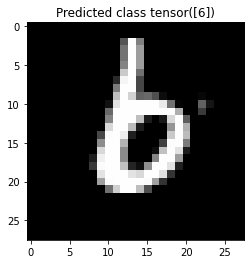

In [ ]:
batch_idx, (data, target) = next(enumerate(test_loader))
data = data.view((-1, 28*28))

outputs = torch.matmul(data, weights)
softmax = F.softmax(outputs, dim=1)
pred = softmax.argmax(dim=1, keepdim=True)

plt.imshow(data[0].view(28, 28), cmap='gray')
plt.title("Predicted class {}".format(pred[0]))
plt.show()